In [1]:
import torch
import torch.nn as nn
import torchinfo
from torchinfo import summary
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Marko Natalia - IMAGE CLASSIFICATION

DIRTY/CLEAN PLATES

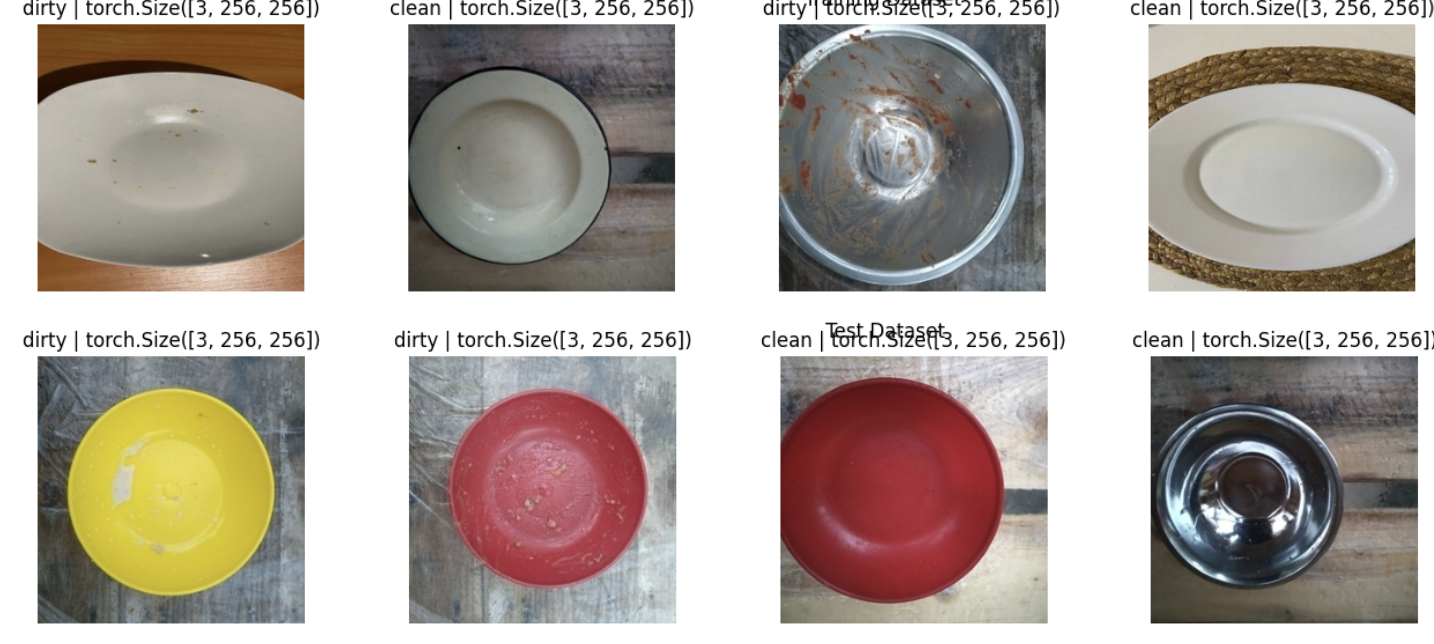

In [3]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1. Data preparation

### Load data

In [8]:
import os
print(os.getcwd())

/Users/nataliamarko/Documents/BIG_DATA_LAB_DATA/Image_classification


In [10]:
# Set the path to the data directory
data_path = '/Users/nataliamarko/Documents/BIG_DATA_LAB_DATA/Image_classification/'
image_folder_path = '/Users/nataliamarko/Documents/BIG_DATA_LAB_DATA/Image_classification/plates'

# Write transform for image
transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.ToTensor()
])
# Load the datasets
train_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/train', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/test', transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/hidden', transform=transform)

# Define a function to display a few random images from a dataset
def show_images(dataset):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))
    for i in range(5):
        idx = torch.randint(len(dataset), size=(1,))
        img, label = dataset[idx]
        ax[i].imshow(img.permute(1, 2, 0))
        ax[i].axis('off')
        ax[i].set_title(f"{dataset.classes[label]} | {img.shape}")

In [12]:
image_folder_path

'/Users/nataliamarko/Documents/BIG_DATA_LAB_DATA/Image_classification/plates'

### Visualization - show a few random images from:

In [15]:
# Set classes
class_names = train_dataset.classes

# # Can also get class names as a dict
# class_dict = train_dataset.class_to_idx

# Set the uotput shape
output_shape = len(class_names)

print(f'the class labels are {class_names}')
print('the output shape is', output_shape)

the class labels are ['clean', 'dirty']
the output shape is 2


In [17]:
img, label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2314, 0.2157, 0.1569,  ..., 0.9412, 0.5961, 0.7608],
         [0.8706, 0.3804, 0.2588,  ..., 0.5686, 0.7412, 0.8000],
         [0.8745, 0.2353, 0.6941,  ..., 0.5843, 0.5804, 0.7843],
         ...,
         [0.7647, 0.7373, 0.2627,  ..., 0.1647, 0.2392, 0.2588],
         [0.7490, 0.7608, 0.2745,  ..., 0.5843, 0.5961, 0.6314],
         [0.7686, 0.7608, 0.2275,  ..., 0.7020, 0.6235, 0.6980]],

        [[0.2392, 0.2275, 0.1686,  ..., 0.9333, 0.4706, 0.5176],
         [0.8824, 0.3961, 0.2745,  ..., 0.5529, 0.5412, 0.4745],
         [0.8941, 0.2510, 0.7137,  ..., 0.5804, 0.3686, 0.4431],
         ...,
         [0.7451, 0.7216, 0.2471,  ..., 0.1216, 0.2000, 0.2275],
         [0.7255, 0.7451, 0.2588,  ..., 0.4549, 0.4706, 0.5294],
         [0.7451, 0.7451, 0.2118,  ..., 0.5059, 0.4314, 0.5333]],

        [[0.2902, 0.2863, 0.2275,  ..., 0.9765, 0.5294, 0.5608],
         [0.9098, 0.4392, 0.3216,  ..., 0.6510, 0.6157, 0.5059],
         [0.8784, 0.2627, 0.7373,  ..., 0.71

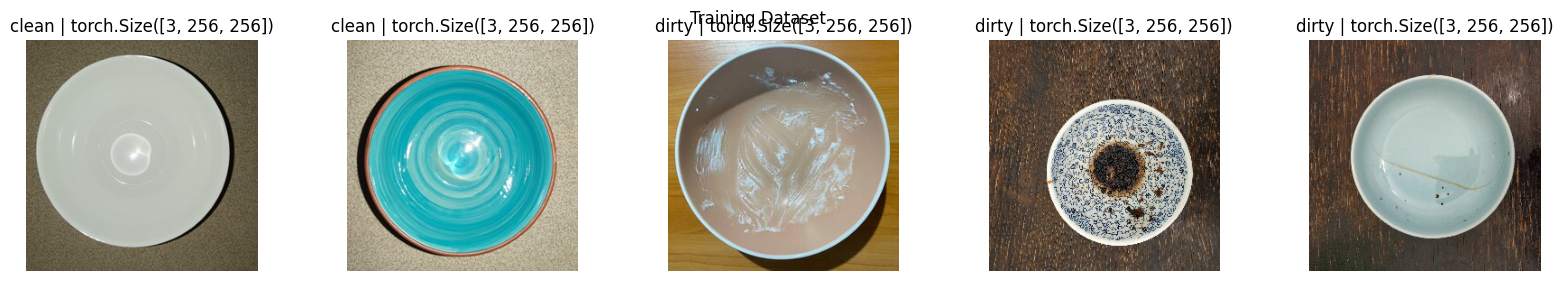

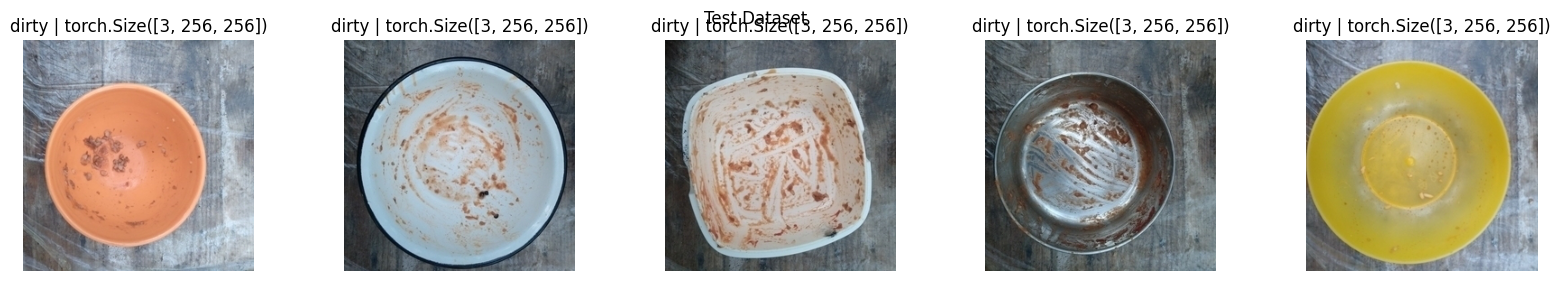

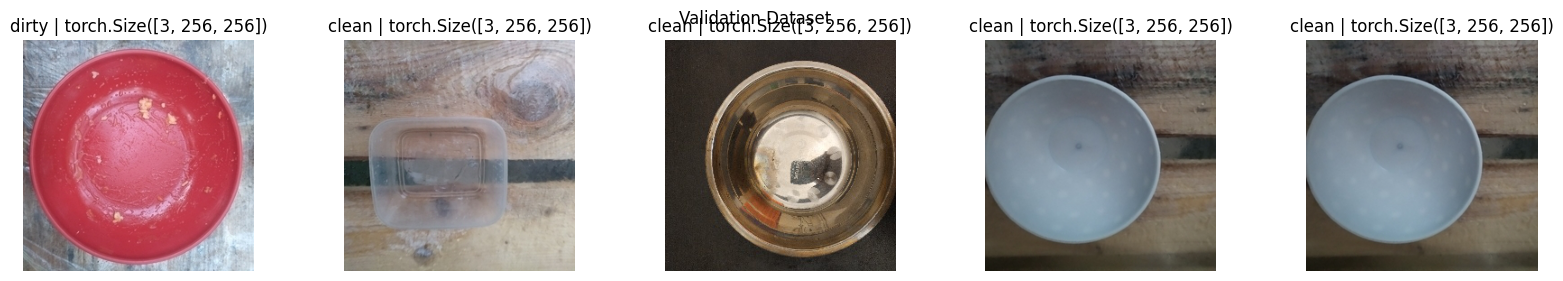

In [19]:
# Display a few random images from the training dataset
show_images(train_dataset)
plt.suptitle('Training Dataset')
plt.show()

# Display a few random images from the test dataset
show_images(test_dataset)
plt.suptitle('Test Dataset')
plt.show()

# Display a few random images from the validation dataset
show_images(valid_dataset)
plt.suptitle('Validation Dataset')
plt.show()


### Additional augmentations

In [21]:
autoaugment_policy = torchvision.transforms.AutoAugmentPolicy.IMAGENET

In [24]:
import torchvision.transforms as transforms

# Define the transformations for data augmentation for train set and for testing&validation
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3)], p=0.5),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.5),
    transforms.AutoAugment(policy=torchvision.transforms.AutoAugmentPolicy.IMAGENET),  # Apply AutoAugment
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor()
])
 
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.CenterCrop(64),
    transforms.ToTensor()
])

### Preparation of DataLoaders for each dataset

In [27]:
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
batch_size = 32
# num_workers = os.cpu_count()//2
num_workers = 4
print(f"Creating DataLoader's with batch size {batch_size} and {num_workers} workers.")

# Load again the datasets
train_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/train', transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/test', transform=test_transform)
valid_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/hidden', transform=test_transform)

# Define the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=3, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)

# Let's check out what we've created
print(f"Dataloaders: {train_loader, test_loader}") 
print(f"Length of train dataloader: {len(train_loader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_loader)} batches of {batch_size}")
print(f"Length of hidden dataloader: {len(valid_loader)} batches of {batch_size}")

Creating DataLoader's with batch size 32 and 4 workers.
Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x132ffc9d0>, <torch.utils.data.dataloader.DataLoader object at 0x305c48b10>)
Length of train dataloader: 9 batches of 32
Length of test dataloader: 15 batches of 32
Length of hidden dataloader: 1 batches of 32


In [29]:
img, label = next(iter(train_loader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

img_test, label_test = next(iter(test_loader))
print(f"Image shape: {img_test.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_test.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])
Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


# 2. Selecting Convolutional Models

We are going to create 2 models:

    - TinyVGG model as model_TinyVGG
    - ConvNet model as model_ConvNet

In [32]:
# Let's define the function for setting the seed
def set_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available(): # GPU operation have separate seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

### Initiate the TinyVGG Class architecture

In [34]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

#### set params to model_TinyVGG

In [36]:
torch.manual_seed(42)

model_TinyVGG = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)

### Initiate the ConvNet Class architecture

In [38]:
class ConvNet(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(input_shape, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128 * 28 * 28, hidden_units)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
        self.fc2 = nn.Linear(hidden_units, output_shape)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        
        return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

#### set params to ConvNet model

In [40]:
torch.manual_seed(42)

model_ConvNet = ConvNet(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)

In [41]:
summary(model_TinyVGG, input_size=[32, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 2]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia


# 3. Train the models

### define train/test steps as a custom func:
- train_step()
- test_step()
combine:
- train_step() and test_step() into train_cnn_model()

In [44]:
def train_step(model: nn.Module, dataloader: DataLoader, 
               loss_fn: nn.Module, optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0.0, 0.0
    
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_acc += (y_pred.argmax(1) == y).type(torch.float).mean().item()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step(model: nn.Module, dataloader: DataLoader, loss_fn: nn.Module):
    model.eval()
    test_loss, test_acc = 0.0, 0.0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            test_acc += (y_pred.argmax(1) == y).type(torch.float).mean().item()

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc  

In [45]:
from tqdm.auto import tqdm

def train_cnn_model(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
 
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model_TinyVGG,
                                           dataloader=train_loader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model_TinyVGG,
                                        dataloader=test_loader,
                                        loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

### Train and Evaluate Model TinyVGG

In [37]:
import ipywidgets as widgets
from IPython.display import display

In [56]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_TinyVGG = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_TinyVGG.parameters(), lr=0.05)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_TinyVGG
model_TinyVGG_results = train_cnn_model(model=model_TinyVGG, 
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 6.1947 | train_acc: 0.4896 | test_loss: 0.7188 | test_acc: 0.3125
Epoch: 2 | train_loss: 0.6974 | train_acc: 0.5000 | test_loss: 0.7197 | test_acc: 0.3125
Epoch: 3 | train_loss: 0.6935 | train_acc: 0.5035 | test_loss: 0.6960 | test_acc: 0.3125
Epoch: 4 | train_loss: 0.6933 | train_acc: 0.5035 | test_loss: 0.6855 | test_acc: 0.6875
Epoch: 5 | train_loss: 0.6943 | train_acc: 0.5000 | test_loss: 0.6866 | test_acc: 0.6875
Epoch: 6 | train_loss: 0.6944 | train_acc: 0.4965 | test_loss: 0.6833 | test_acc: 0.6875
Epoch: 7 | train_loss: 0.6931 | train_acc: 0.5104 | test_loss: 0.6959 | test_acc: 0.3125
Epoch: 8 | train_loss: 0.6957 | train_acc: 0.5035 | test_loss: 0.7131 | test_acc: 0.3125
Epoch: 9 | train_loss: 0.6940 | train_acc: 0.5000 | test_loss: 0.6988 | test_acc: 0.3125
Epoch: 10 | train_loss: 0.6935 | train_acc: 0.4965 | test_loss: 0.6831 | test_acc: 0.6875
Epoch: 11 | train_loss: 0.6945 | train_acc: 0.5000 | test_loss: 0.6951 | test_acc: 0.3125
Epoch: 12 | train_l

### Train and Evaluate Model ConvNet

In [57]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 20

model_ConvNet = ConvNet(input_shape=3,
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_ConvNet.parameters(), lr=0.05)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_ConvNet
model_ConvNet_results = train_cnn_model(model=model_ConvNet, 
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6932 | train_acc: 0.5000 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 2 | train_loss: 0.6931 | train_acc: 0.5069 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 3 | train_loss: 0.6930 | train_acc: 0.5104 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 4 | train_loss: 0.6931 | train_acc: 0.5035 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 5 | train_loss: 0.6931 | train_acc: 0.5069 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 6 | train_loss: 0.6935 | train_acc: 0.4896 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 7 | train_loss: 0.6933 | train_acc: 0.4965 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 8 | train_loss: 0.6932 | train_acc: 0.5000 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 9 | train_loss: 0.6934 | train_acc: 0.4931 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 10 | train_loss: 0.6933 | train_acc: 0.4965 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 11 | train_loss: 0.6931 | train_acc: 0.5069 | test_loss: 0.6889 | test_acc: 0.6875
Epoch: 12 | train_l

### Perform an analysis of the training process:

- display plots of the loss on the training and test datasets and accuracy on the training and test datasets.

#### Plot the loss curves of Model TinyVGG

In [60]:
# Check the model_TinyVGG_results keys
model_TinyVGG_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [61]:
import helper

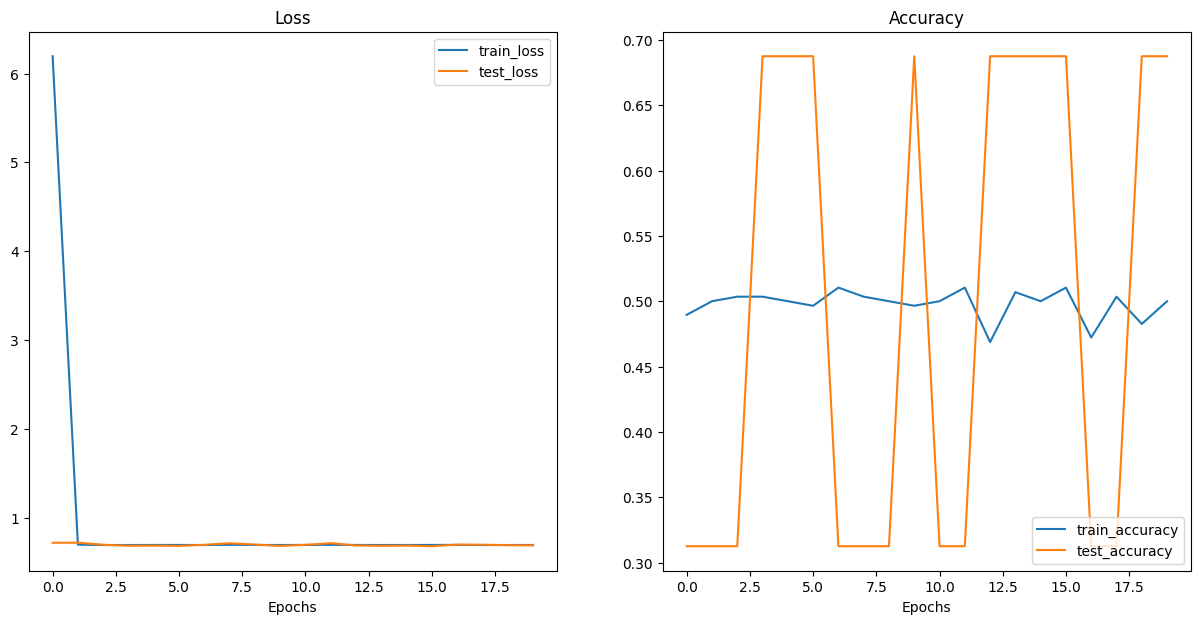

In [62]:
helper.plot_loss_curves(model_TinyVGG_results)

General Observations

Fluctuations: Both training and testing metrics exhibit fluctuations but maintain a general improvement trend. This is typical in training dynamics, especially with complex datasets or models that might be sensitive to initial conditions or hyperparameter settings.

Overfitting: There isn’t a clear indication of overfitting as both training and testing losses decrease. However, careful monitoring is required in future epochs to ensure that the testing loss continues to decrease or stabilize without increasing, which would suggest overfitting.

#### Plot the loss curves of Model ConvNet

In [65]:
# Check the model_TinyVGG_results keys
model_ConvNet_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

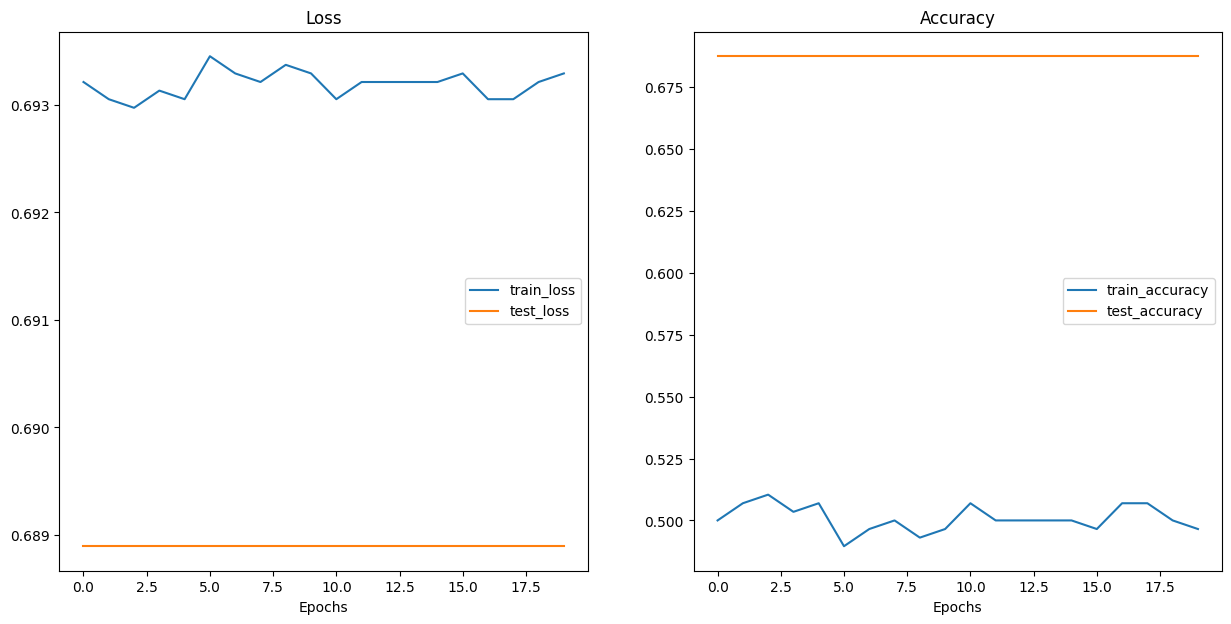

In [66]:
helper.plot_loss_curves(model_ConvNet_results)

#### What should an ideal loss curve look like?

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="different training and test loss curves illustrating overfitting, underfitting and the ideal loss curves" width="800"/>

### Compare models results

In [69]:
import pandas as pd
model_TinyVGG_df = pd.DataFrame(model_TinyVGG_results)
model_ConvNet_df = pd.DataFrame(model_ConvNet_results)
model_TinyVGG_df, model_ConvNet_df

(    train_loss  train_acc  test_loss  test_acc
 0     6.194706   0.489583   0.718783    0.3125
 1     0.697380   0.500000   0.719726    0.3125
 2     0.693501   0.503472   0.695994    0.3125
 3     0.693326   0.503472   0.685529    0.6875
 4     0.694282   0.500000   0.686593    0.6875
 5     0.694410   0.496528   0.683267    0.6875
 6     0.693127   0.510417   0.695906    0.3125
 7     0.695665   0.503472   0.713119    0.3125
 8     0.694037   0.500000   0.698759    0.3125
 9     0.693467   0.496528   0.683053    0.6875
 10    0.694534   0.500000   0.695068    0.3125
 11    0.695458   0.510417   0.714114    0.3125
 12    0.694314   0.468750   0.688284    0.6875
 13    0.693440   0.506944   0.684413    0.6875
 14    0.693779   0.500000   0.686849    0.6875
 15    0.694366   0.510417   0.679795    0.6875
 16    0.694744   0.472222   0.697736    0.3125
 17    0.693231   0.503472   0.697036    0.3125
 18    0.693440   0.482639   0.691009    0.6875
 19    0.693940   0.500000   0.688895   

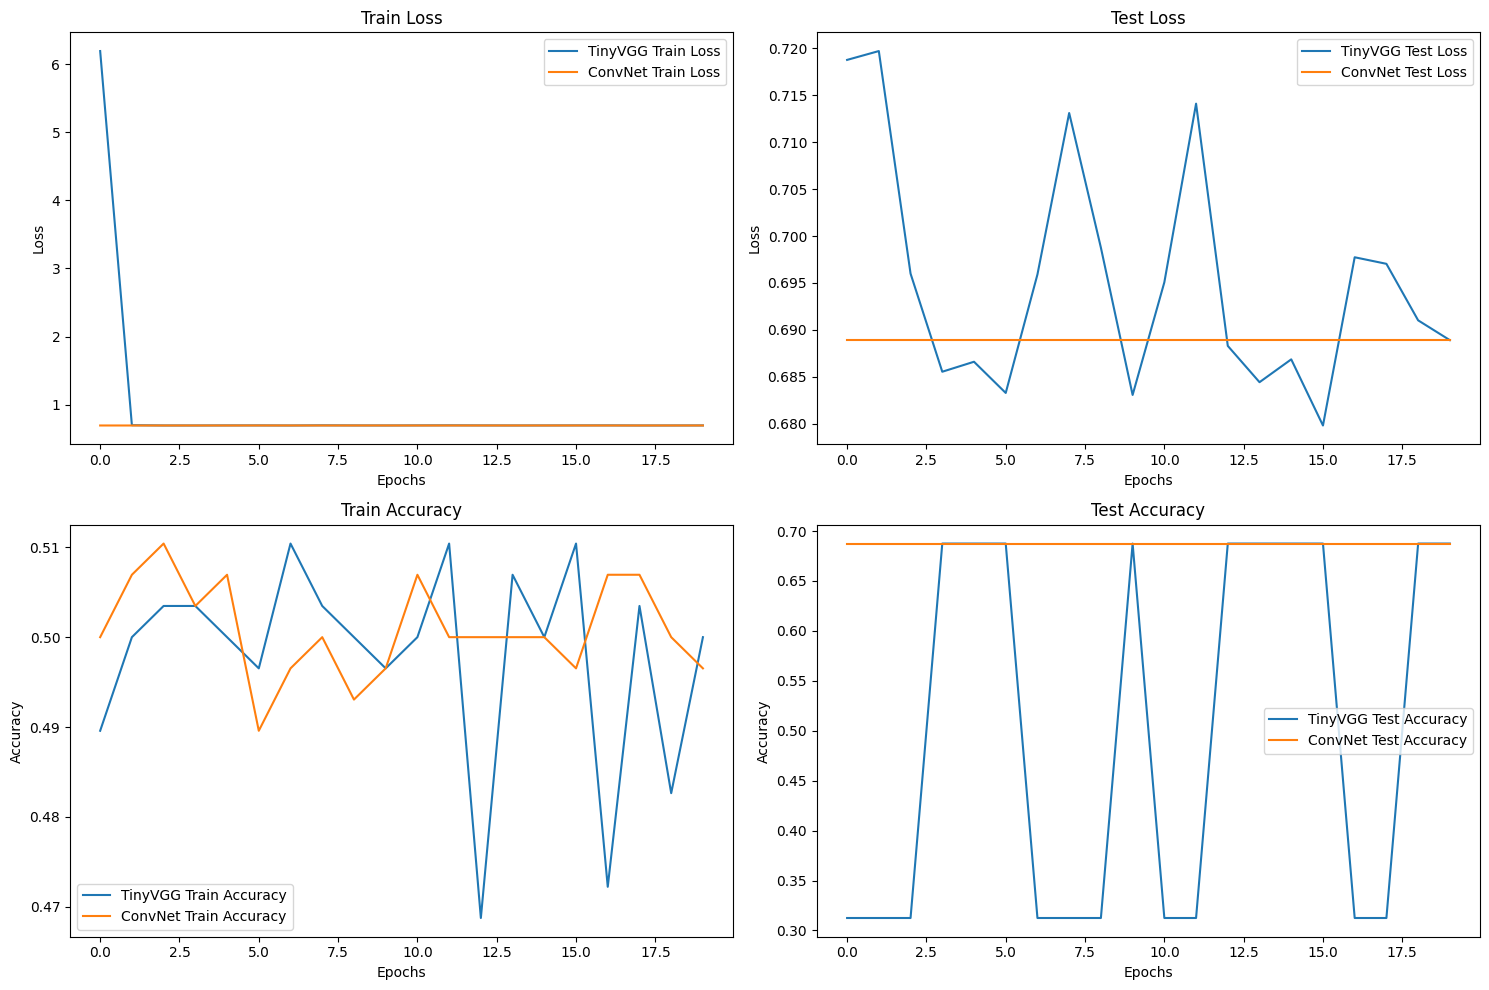

In [70]:
import helper
import torch as nn
helper.plot_training_metrics(model_TinyVGG_df, model_ConvNet_df, model_name1='TinyVGG', model_name2='ConvNet')

# 4. Saving first our models

In [72]:
from pathlib import Path

# Create the model directory
model_TinyVGG_path = Path('models_TinyVGG')
model_TinyVGG_path.mkdir(parents=True, exist_ok=True)

# Define the model name and save path
model_name_TinyVGG = "Marko_NN_model_TinyVGG.pt"
model_TinyVGG_save_path = model_TinyVGG_path / model_name_TinyVGG

# Save the model's state dictionary
print(f"Saving model TinyVGG to: {model_TinyVGG_save_path}")
torch.save(obj=model_TinyVGG.state_dict(), f=model_TinyVGG_save_path)


Saving model TinyVGG to: models_TinyVGG/Marko_NN_model_TinyVGG.pt


In [73]:
from pathlib import Path

# Create the model directory
model_ConvNet_path = Path('models_ConvNet')
model_ConvNet_path.mkdir(parents=True, exist_ok=True)

# Define the model name and save path
model_name_ConvNet = "Marko_NN_model_ConvNet.pt"
model_ConvNet_save_path = model_ConvNet_path / model_name_ConvNet

# Save the model's state dictionary
print(f"Saving model ConvNet to: {model_ConvNet_save_path}")
torch.save(obj=model_ConvNet.state_dict(), f=model_ConvNet_save_path)

Saving model ConvNet to: models_ConvNet/Marko_NN_model_ConvNet.pt


# 5. Now, we could load our models 

In [75]:
from pathlib import Path

# Define the model directory and file path for TinyVGG
model_TinyVGG_path = Path('models_TinyVGG')
model_name_TinyVGG = "Marko_NN_model_TinyVGG.pt"
model_TinyVGG_load_path = model_TinyVGG_path / model_name_TinyVGG

# Load the model state dictionary for TinyVGG
model_TinyVGG.load_state_dict(torch.load(model_TinyVGG_load_path))

print("<All keys matched successfully>")

# Define the model directory and file path for ConvNet
model_ConvNet_path = Path('models_ConvNet')
model_name_ConvNet = "Marko_NN_model_ConvNet.pt"
model_ConvNet_load_path = model_ConvNet_path / model_name_ConvNet

# Load the model state dictionary for ConvNet
model_ConvNet.load_state_dict(torch.load(model_ConvNet_load_path))

print("<All keys matched successfully>")


<All keys matched successfully>
<All keys matched successfully>


### THANKS FOR YOUR ATTENTION!

### the second part will be contunued